# Clausius-Rankine-Prozess

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/sgeorg%2Fpython-thermo/HEAD?filepath=Clausius-Rankine-Prozess.ipynb)

Berechnet wird ein Kraftwerksprozess (Clausius-Rankine-Kreisprozess), wobei Parameterabhängig zwischen unterkritisch und überkritisch unterschieden wird. Es wird der Prozess ohne Zwischenüberhitzung (ZÜ) und mit einfacher ZÜ veglichen. Die Sollgrößen des Prozesses sind:
* Elektrische Leistung des Generators
* Heißdampf-Temperatur
* Heißdampf-Druck
* Heißdampf-Temperatur (ZÜ)
* Heißdampf-Druck (ZÜ)
* Dampfgehalt nach der Turbine
Die Sollgrößen werden im Kapitel [Setup](#Setup) definiert.

Zustandsänderungen:
* 1 $\to$ 2: Pumpe; isentrope Druckerhöhung
* 2 $\to$ 3: Verdampfer; isobare Verdampfung
* 3 $\to$ 4: Überhitzer; isobares Erwärmen
* 4 $\to$ 5: Turbine; isentrope Wandlung
* 5 $\to$ 1: Kondensator; isobare Kondensation
 
Mit Zwischenüberhitzung:
* 5 $\to$ 5z1: Zwischenüberhitzung; isobares Erwärmen
* 5z1 $\to$ 5z2: ND-Turbine; isentrope Wandlung
* 5z2 $\to$ 1z:  Kondensator; isobare Kondensation

Beim überkritischen Prozess werden die Zustandsänderungen  2 $\to$ 3 (Verdampfen) und 3 $\to$ 4 (Überhitzen) nicht separat berechnet.  Der Punkt 3 liegt statt dessen mit Punkt 4 zusammen und die Zustandsänderung 2 $\to$ 4 wird als kombiniertes Verdampfen/Überhitzen betrachtet

**Beim erstmaligen starten bitte im Menü auf *Kernel->Restart & Run All* gehen.**

## Setup

In [1]:
%matplotlib notebook
from scipy.optimize import brentq
from CoolProp.CoolProp import PropsSI
import matplotlib.pyplot as plot
from IPython.display import Markdown
import numpy as np


# Hilfsfunktion für Zahlenformatierung
def d(obj, format):
    return '{0:{1}}'.format(obj, format)


W_el = 600e6         # elektr. Leistung / W
T_max = 600 + 273.15 # Heißdampftemperatur / K
p_max = 180e5        # Heißdampfdruck / Pa
T_zw = 540 + 273.15  # Temperatur der Zwischenüberhitzung / K
p_zw = 32.5e5        # Druck Zwischenüberhitzung / Pa
x = 0.99             # Dampfgehalt nach Turbine
fluid = 'water'      # Zu nutzendes Fluid


# Test auf Überkritischen Prozess
if p_max >= PropsSI('Pcrit', fluid):
    critical = True
else:
    critical = False  

## Berechnung der Zustandspunkte

In [2]:
# Hauptprozess
T4 = T_max
p4 = p_max
s4 = PropsSI('S', 'T', T4, 'P', p4, fluid)
h4 = PropsSI('H', 'T', T4, 'P', p4, fluid)

s5 = s4
T5 = brentq(lambda T: PropsSI('S', 'T', T, 'Q', x, fluid) - s5, 300, 600) # Schnittpunkt suchen, da direkte Berechnung nicht möglich
p5 = PropsSI('P', 'T', T5, 'Q', x, fluid)
h5 = PropsSI('H', 'T', T5, 'S', s5, fluid)

T1 = T5
p1 = p5
s1 = PropsSI('S', 'T', T1, 'Q', 0, fluid)
h1 = PropsSI('H', 'T', T1, 'Q', 0, fluid)

T2 = T1
p2 = p_max
s2 = PropsSI('S', 'T', T2, 'P', p2, fluid)
h2 = PropsSI('H', 'T', T2, 'P', p2, fluid)

if critical:
    p3 = p4
    T3 = T4
    s3 = s4
    h3 = h4
else:
    p3 = p2
    T3 = PropsSI('T', 'P', p3, 'Q', 1, fluid)
    s3 = PropsSI('S', 'P', p3, 'Q', 1, fluid)
    h3 = PropsSI('H', 'P', p3, 'Q', 1, fluid)


# Zwischenüberhitzung
T5z1 = T_zw
p5z1 = p_zw
h5z1 = PropsSI('H', 'T', T5z1, 'P', p5z1, fluid)
s5z1 = PropsSI('S', 'T', T5z1, 'P', p5z1, fluid)

s5z2 = s5z1
T5z2 = brentq(lambda T: PropsSI('S', 'T', T, 'Q', x, fluid) - s5z2, 300, 600) # Schnittpunkt suchen, da direkte Berechnung nicht möglich
p5z2 = PropsSI('P', 'T', T5z2, 'Q', x, fluid)
h5z2 = PropsSI('H', 'T', T5z2, 'S', s5z2, fluid)

T1z = T5z2
p1z = p5z2
s1z = PropsSI('S', 'T', T1z, 'Q', 0, fluid)
h1z = PropsSI('H', 'T', T1z, 'Q', 0, fluid)

p2z = p_max
h2z = PropsSI('H', 'T', T1z, 'P', p2z, fluid)

## T-s- und h-s-Diagramm

<IPython.core.display.Javascript object>


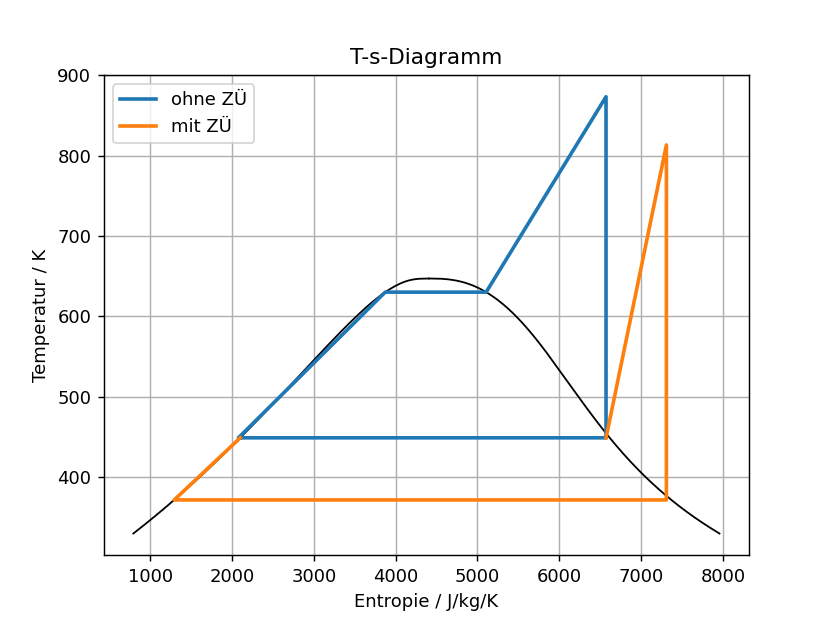

<IPython.core.display.Javascript object>


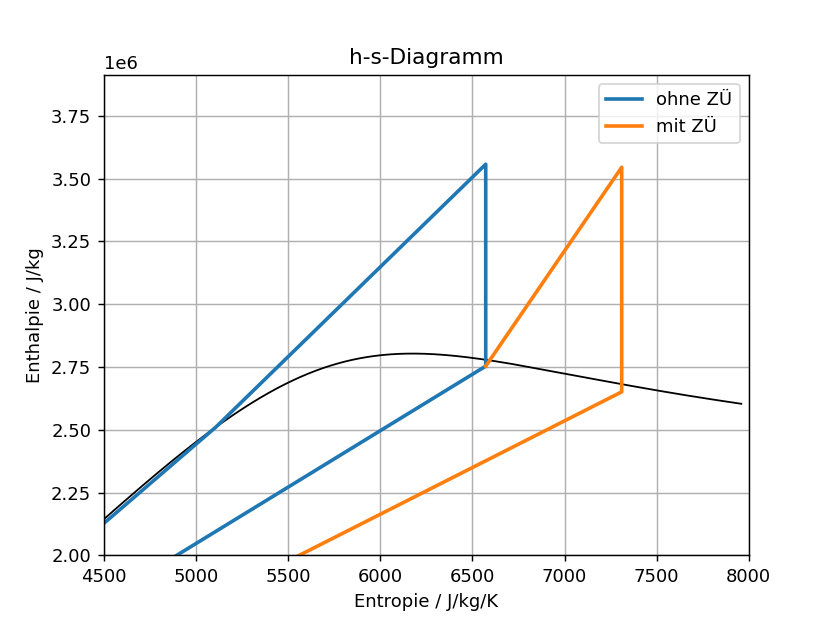

In [3]:
# Siede-/Taulinie berechnen
TT = np.linspace(330, PropsSI('Tcrit', fluid), 1000)
ss_sieden = PropsSI('S', 'T', TT, 'Q', 0, fluid)
ss_kond = PropsSI('S', 'T', TT, 'Q', 1, fluid)
hh_sieden = PropsSI('H', 'T', TT, 'Q', 0, fluid)
hh_kond = PropsSI('H', 'T', TT, 'Q', 1, fluid)

# T-s-Diagramm
plot.figure(dpi=130)
if critical:
    TT23 = np.linspace(T2, T3)
    ss23 = PropsSI('S', 'P', p2, 'T', TT23, fluid)
else:
    # Zwischenwert auf Siedelinie wird zum Plotten benötigt
    TT23 = [PropsSI('T', 'P', p2, 'Q', 0, fluid)] 
    ss23 = [PropsSI('S', 'P', p2, 'Q', 0, fluid)]
plot.plot(ss_sieden, TT, 'k-', linewidth=1)
plot.plot(ss_kond, TT, 'k-', linewidth=1)
plot.plot([s1, s2, *ss23, s3, s4, s5, s1], [T1, T2, *TT23, T3, T4, T5, T1], 'C0-', linewidth=2, label='ohne ZÜ')
plot.plot([s5, s5z1, s5z2, s1z, s1], [T5, T5z1, T5z2, T1z, T1], 'C1-', linewidth=2, label='mit ZÜ')
plot.title('T-s-Diagramm')
plot.xlabel('Entropie / J/kg/K')
plot.ylabel('Temperatur / K')
plot.grid(True)
plot.legend()

# h-s-Diagramm
plot.figure(dpi=130)
if critical:
    hh23 = PropsSI('H', 'P', p2, 'T', TT23, fluid)
else:
    # Zwischenwert auf Siedelinie wird zum Plotten benötigt
    hh23 = [PropsSI('H', 'P', p2, 'Q', 0, fluid)] 
plot.plot(ss_sieden, hh_sieden, 'k-', linewidth=1)
plot.plot(ss_kond, hh_kond, 'k-', linewidth=1)
plot.plot([s1, s2, *ss23, s3, s4, s5, s1], [h1, h2, *hh23, h3, h4, h5, h1], 'C0-', linewidth=2, label='ohne ZÜ')
plot.plot([s5, s5z1, s5z2, s1z, s1], [h5, h5z1, h5z2, h1z, h1], 'C1-', linewidth=2, label='mit ZÜ')
plot.xlim([4500, 8000])
#plot.ylim([2e6, 3.5e6])
plot.ylim([2e6, 1.1 * PropsSI('H', 'P', p4, 'T', T4, fluid)])
plot.title('h-s-Diagramm')
plot.xlabel('Entropie / J/kg/K')
plot.ylabel('Enthalpie / J/kg')
plot.grid(True)
plot.legend()

## Zahlenwerte (ohne ZÜ) <a id="Zahlenwerte-ohne-ZU">

In [4]:
Dm = W_el / (h4 - h5)
W_pumpe = Dm * (h2 - h1)
Q_vd = Dm * (h3 - h2)
Q_sh = Dm * (h4 - h3)
Q_kd = Dm * (h5 - h1)

Markdown(f"""
Dampfparameter            | {d(T_max-273.15, '.3n')} °C / {d(p_max/1e5, '.3n')} bar
--------------------------|------------------------------------------------
Dampfmassenstrom          | {d(Dm * 3.6, '.5n')} Mg/h
Pumpenleistung            | {d(W_pumpe/1e3, '.5n')} kW
Verdampferleistung        | {d(Q_vd/1e6, '.5n')} MW
Überhitzerleistung        | {d(Q_sh/1e6, '.5n')} MW
Gesamte Feuerungsleistung | {d((Q_vd+Q_sh)/1e6, '.5n')} MW
Kondensatorleistung       | {d(Q_kd/1e6, '.5n')} MW
Kondensatordruck          | {d(p5/1e5, '.5n')} bar
Wirkungsgrad              | {d(W_el/(Q_vd+Q_sh)*100, '.3n')}%
Carnotwirkungsgrad        | {d((1-T5/T_max)*100, '.3n')}%""")


Dampfparameter            | 600 °C / 180 bar
--------------------------|------------------------------------------------
Dampfmassenstrom          | 2687.8 Mg/h
Pumpenleistung            | 6876.6 kW
Verdampferleistung        | 1310.9 MW
Überhitzerleistung        | 781.72 MW
Gesamte Feuerungsleistung | 2092.7 MW
Kondensatorleistung       | 1499.5 MW
Kondensatordruck          | 9.1076 bar
Wirkungsgrad              | 28.7%
Carnotwirkungsgrad        | 48.6%

## Zahlenwerte (mit ZÜ) <a id="Zahlenwerte-mit-ZU">

In [5]:
Dm_zw = W_el / ((h4 - h5) + (h5z1 - h5z2))
W_pumpe_zw = Dm_zw * (h2z - h1z)
Q_vd_zw = Dm_zw * (h3 - h2z)
Q_sh_zw = Dm_zw * (h4 - h3)
Q_zw = Dm_zw * (h5z1 - h5)
Q_kd_zw = Dm_zw * (h5z2 - h1z)

Markdown(f"""
Dampfparameter HD<br>Dampfparameter ND          | {d(T_max-273.15, '.3n')} °C / {d(p_max/1e5, '.3n')} bar<br>{d(T_zw-273.15, '.3n')} °C / {d(p_zw/1e5, '.3n')} bar
---------------------------|--------------------------------------------
Dampfmassenstrom           | {d(Dm_zw*3.6, '.5n')} Mg/h
Pumpenleistung             | {d(W_pumpe_zw/1e3, '.5n')} kW
Verdampferleistung         | {d(Q_vd_zw/1e6, '.5n')} MW
Überhitzerleistung         | {d(Q_sh_zw/1e6, '.5n')} MW
Zwischenüberhitzerleistung | {d(Q_zw/1e6, '.5n')} MW
Gesamte Feuerungsleistung  | {d((Q_vd_zw+Q_sh_zw+Q_zw)/1e6, '.5n')} MW
Kondensatorleistung        | {d(Q_kd_zw/1e6, '.5n')} MW
Kondensatordruck           | {d(p5z2/1e5, '.5n')} bar
Wirkungsgrad               | {d(W_el/(Q_vd_zw+Q_sh_zw+Q_zw)*100, '.3n')}%
Carnotwirkungsgrad         | {d((1-T5z2/T_max)*100, '.3n')}%""")


Dampfparameter HD<br>Dampfparameter ND          | 600 °C / 180 bar<br>540 °C / 32.5 bar
---------------------------|--------------------------------------------
Dampfmassenstrom           | 1272.4 Mg/h
Pumpenleistung             | 4788.5 kW
Verdampferleistung         | 736.21 MW
Überhitzerleistung         | 370.05 MW
Zwischenüberhitzerleistung | 279.76 MW
Gesamte Feuerungsleistung  | 1386 MW
Kondensatorleistung        | 790.81 MW
Kondensatordruck           | 0.96474 bar
Wirkungsgrad               | 43.3%
Carnotwirkungsgrad         | 57.4%